In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS


In [2]:
df=pd.read_csv('Hotel_Reviews.csv')

In [3]:
df.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

In [4]:
df.sample(8)

Hotel_Address  \
375656  Mandeville Place Westminster Borough London W1...   
228497  65 73 Shaftesbury Avenue Westminster Borough L...   
195314       49 Rue La Fayette 9th arr 75009 Paris France   
63540   160 Cromwell Road Kensington Kensington and Ch...   
43000   13 15 Gower Street Camden London WC1E 6HE Unit...   
413267  Pla a Rosa dels Vents 1 Passeig Joan de Borbo ...   
161617  36 37 Lancaster Gate Westminster Borough Londo...   
123750  26 28 Trebovir Rd Kensington and Chelsea Londo...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
375656                           495   8/11/2016            8.5   
228497                           531   6/21/2017            9.0   
195314                           205   5/12/2017            8.1   
63540                            148   4/16/2016            9.0   
43000                            111    9/5/2015            8.3   
413267                           332   3/29/2016            8.5   
161617                           322   5/28/2016            8.4   
123750                           328  11/19/2015            7.5   

                                               Hotel_Name  \
375656                               The Mandeville Hotel   
228497                     The Piccadilly London West End   
195314  Best Western Premier Op ra Faubourg Ex Hotel J...   
63540                    Hotel Xenia Autograph Collection   
43000                                  Staunton Hotel B B   
413267                                        W Barcelona   
161617                                    Arbor Hyde Park   
123750                         Mayflower Hotel Apartments   

              Reviewer_Nationality  \
375656       United Arab Emirates    
228497   United States of America    
195314                   Portugal    
63540                    Thailand    
43000              United Kingdom    
413267             United Kingdom    
161617             United Kingdom    
123750             United Kingdom    

                                          Negative_Review  \
375656                                        Small rooms   
228497                                        No Negative   
195314                                        No Negative   
63540                      Can t really work in the room    
43000    Beds were very hard but a mattress topper wou...   
413267                                        No Negative   
161617   No restaurant other than for breakfast so hav...   
123750   I booked through a company card and although ...   

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
375656                                  3                     2300   
228497                                  0                     2298   
195314                                  0                     1966   
63540                                   9                      682   
43000                                  15                      615   
413267                                  0                     2708   
161617                                 36                     2140   
123750                                 66                     2197   

                                          Positive_Review  \
375656                                           Location   
228497   Very friendly staff Bed bathroom most comfort...   
195314   Excellent location perfect and very confortab...   
63540                                      Helpful staff    
43000    Staff extremely pleasant and helpful We had a...   
413267                             view service room food   
161617   Staff were lovely excellent breakfast Comfort...   
123750   This was my second visit to the hotel Both ti...   

        Review_Total_Positive_Word_Counts  \
375656                                  2   
228497                                 20   
195314                                  9   
63540                                   4   
43000                                  64

In [5]:
df.shape


(515738, 17)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [7]:
df.describe()

Additional_Number_of_Scoring  Average_Score  \
count                 515738.000000  515738.000000   
mean                     498.081836       8.397487   
std                      500.538467       0.548048   
min                        1.000000       5.200000   
25%                      169.000000       8.100000   
50%                      341.000000       8.400000   
75%                      660.000000       8.800000   
max                     2682.000000       9.800000   

       Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
count                      515738.000000            515738.000000   
mean                           18.539450              2743.743944   
std                            29.690831              2317.464868   
min                             0.000000                43.000000   
25%                             2.000000              1161.000000   
50%                             9.000000              2134.000000   
75%                            23.000000              3613.000000   
max                           408.000000             16670.000000   

       Review_Total_Positive_Word_Counts  \
count                      515738.000000   
mean                           17.776458   
std                            21.804185   
min                             0.000000   
25%                             5.000000   
50%                            11.000000   
75%                            22.000000   
max                           395.000000   

       Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
count                               515738.000000   515738.000000   
mean                                     7.166001        8.395077   
std                                     11.040228        1.637856   
min                                      1.000000        2.500000   
25%                                      1.000000        7.500000   
50%                                      3.000000        8.800000   
75%                                      8.000000        9.600000   
max                                    355.000000       10.000000   

                 lat            lng  
count  512470.000000  512470.000000  
mean       49.442439       2.823803  
std         3.466325       4.579425  
min        41.328376      -0.369758  
25%        48.214662      -0.143372  
50%        51.499981       0.010607  
75%        51.516288       4.834443  
max        52.400181      16.429233

In [9]:
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
df.isnull().sum()


Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [10]:
df['Hotel_Address'].nunique()

1493

<Axes: xlabel='Average_Score', ylabel='count'>

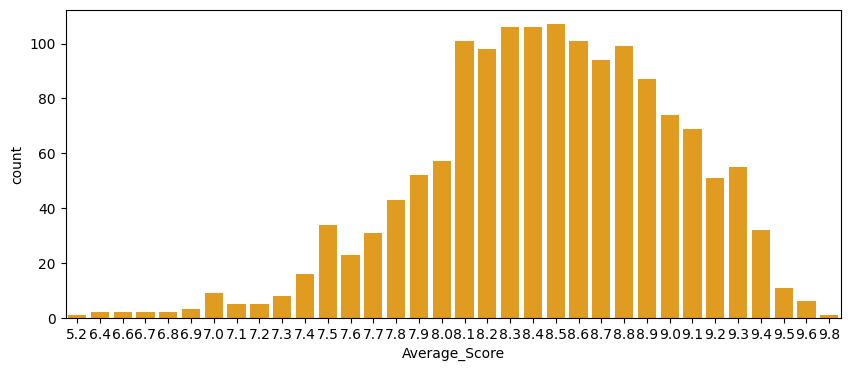

In [11]:
df_sd = df[['Hotel_Name','Average_Score']].drop_duplicates() 
plt.figure(figsize = (10,4))
sns.countplot(x = 'Average_Score',data = df_sd,color = 'orange')

In [12]:

df.Average_Score.describe()



count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

In [13]:
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK')
df['Country'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1])

<Axes: title={'center': 'Most Hotels in Europe By Countries'}, ylabel='Country'>

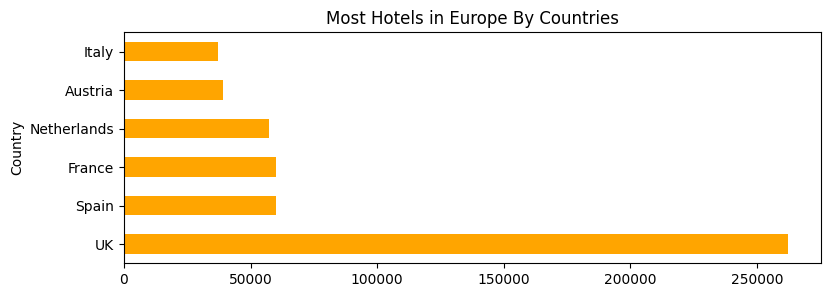

In [14]:
plt.figure(figsize = (9,3))
plt.title('Most Hotels in Europe By Countries')
df.Country.value_counts().plot.barh(color = 'orange')

In [15]:
df[df.Average_Score >= 8.8][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews',ascending = False)[:15]

Hotel_Name  Average_Score  \
404728                                Glam Milano            8.8   
309843                              Jaz Amsterdam            8.9   
327773                        Ayre Hotel Gran V a            8.8   
57597   M by Montcalm Shoreditch London Tech City            9.1   
450210                             Hotel Esther a            9.1   
180550                   citizenM Tower of London            9.1   
370315         25hours Hotel beim MuseumsQuartier            8.8   
361190                      Hilton London Wembley            8.8   
14829              Intercontinental London The O2            9.4   
470003                    The Square Milano Duomo            9.0   
347200                           Room Mate Aitana            8.8   
483570                                Hotel Berna            9.2   
428187         Austria Trend Hotel Savoyen Vienna            8.9   
464405                             Hotel Stefanie            9.1   
96177                    citizenM London Bankside            9.1   

        Total_Number_of_Reviews  
404728                     7371  
309843                     7108  
327773                     4887  
57597                      4802  
450210                     4687  
180550                     4672  
370315                     4324  
361190                     4305  
14829                      4204  
470003                     4192  
347200                     4097  
483570                     4017  
428187                     4016  
464405                     3883  
96177                      3802

In [15]:
df['Positive_Review']


0          Only the park outside of the hotel was beauti...
1          No real complaints the hotel was great great ...
2          Location was good and staff were ok It is cut...
3          Great location in nice surroundings the bar a...
4           Amazing location and building Romantic setting 
                                ...                        
515733                                             location
515734        Breakfast was ok and we got earlier check in 
515735                                          No Positive
515736     The rooms are enormous and really comfortable...
515737                                 staff was very kind 
Name: Positive_Review, Length: 515738, dtype: object

In [16]:
import nltk
from nltk import FreqDist
import re 
import spacy

In [17]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

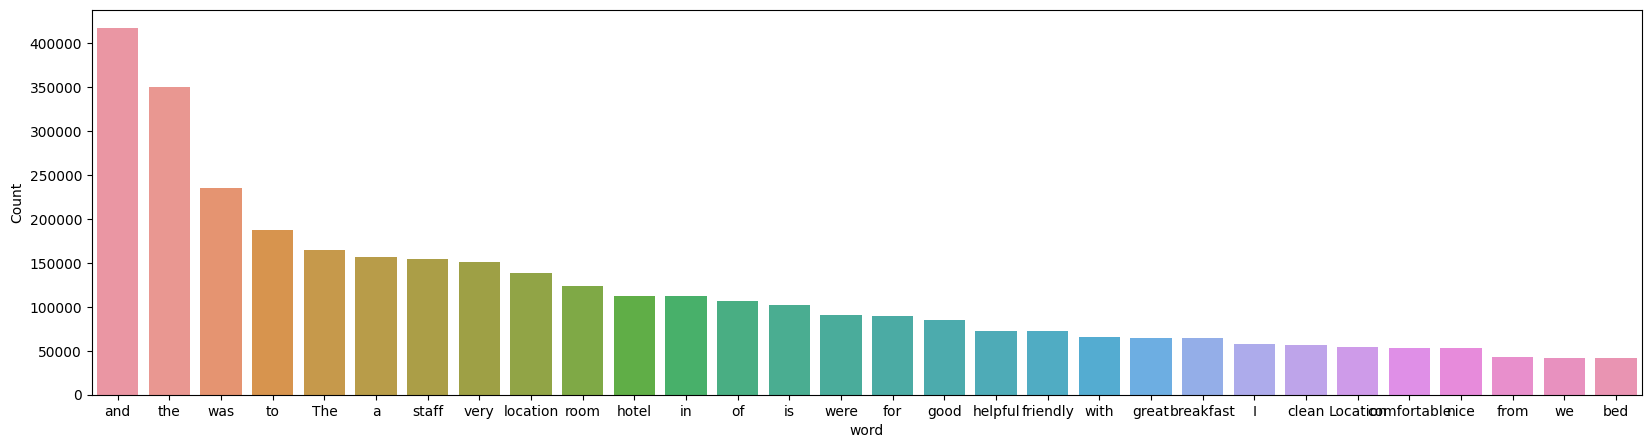

In [18]:
freq_words(df['Positive_Review'])

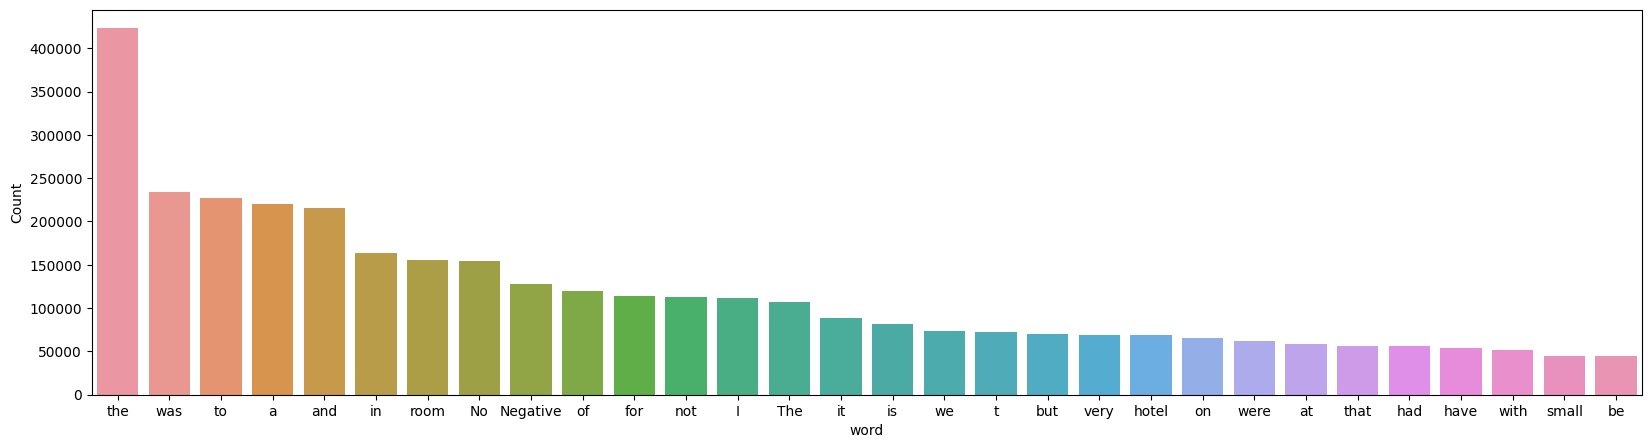

In [19]:
freq_words(df['Negative_Review'])

In [20]:
df['Positive_Review'] = df['Positive_Review'].str.replace("[^a-zA-Z#]", " ")
df['Negative_Review'] = df['Negative_Review'].str.replace("[^a-zA-Z#]", " ")

In [21]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

df['Positive_Review'] = df['Positive_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


# remove stopwords from the text
reviews_1 = [remove_stopwords(r.split()) for r in df['Positive_Review']]
reviews_2 = [remove_stopwords(r.split()) for r in df['Negative_Review']]





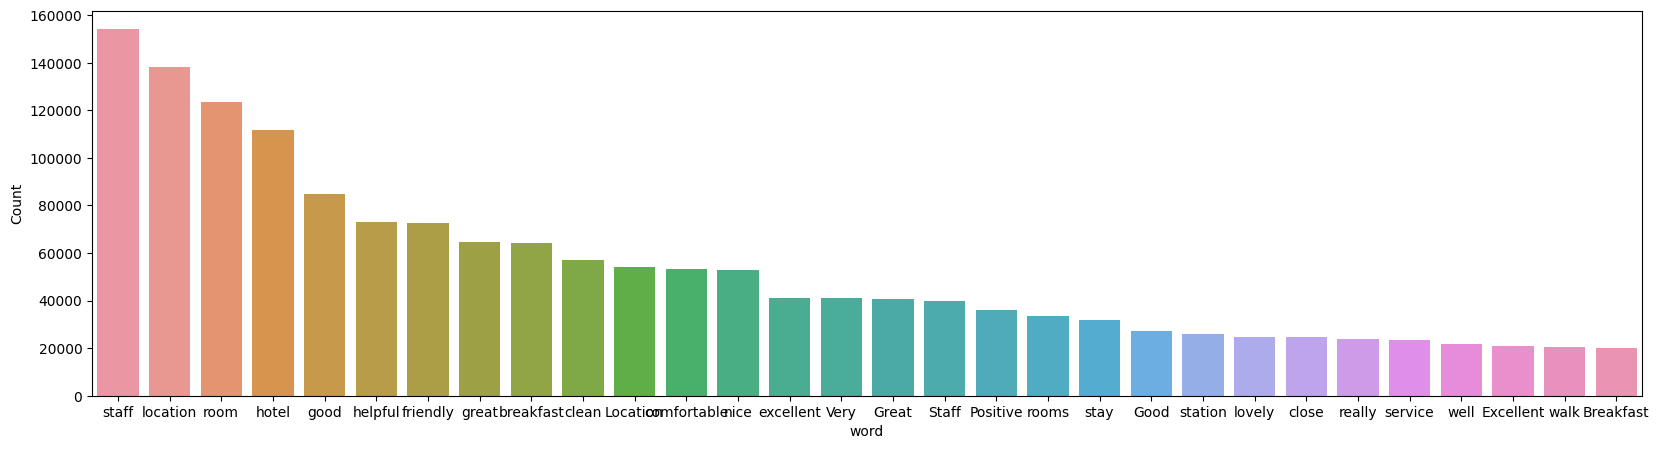

In [22]:
freq_words(reviews_1, 30)


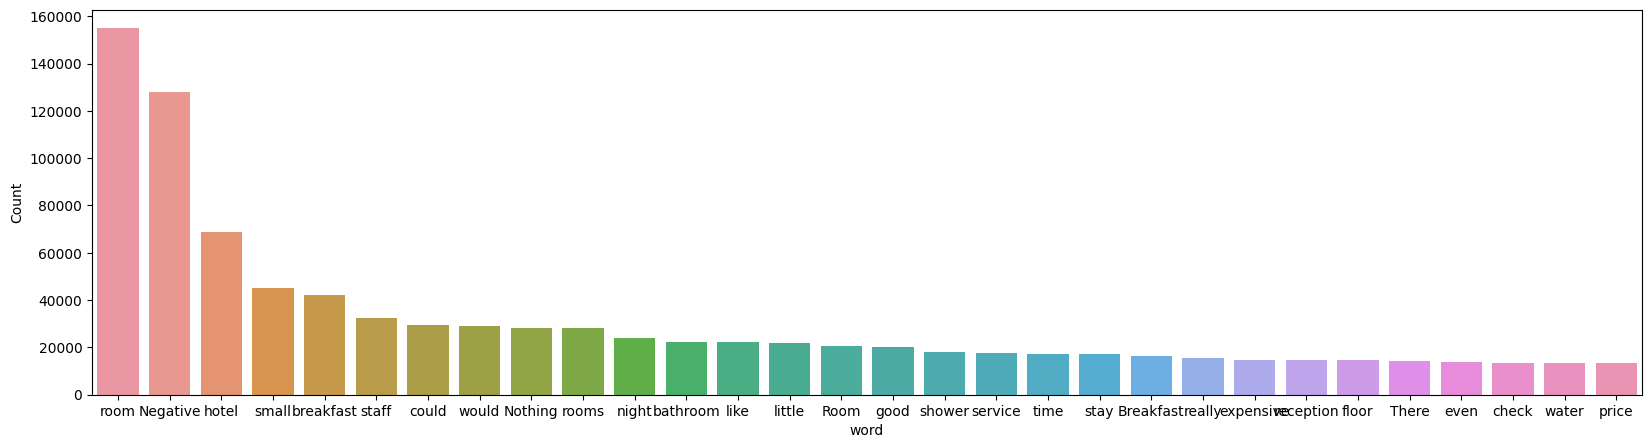

In [23]:
freq_words(reviews_2, 30)
           

Positive reviews


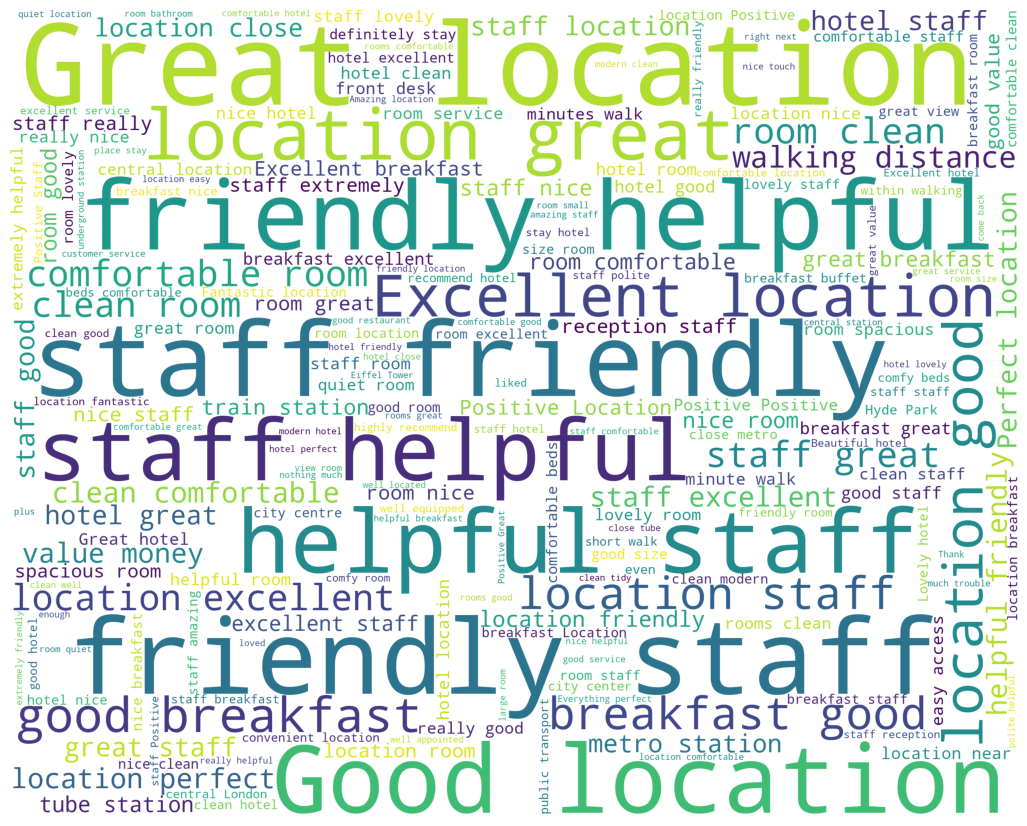

Negative reviews


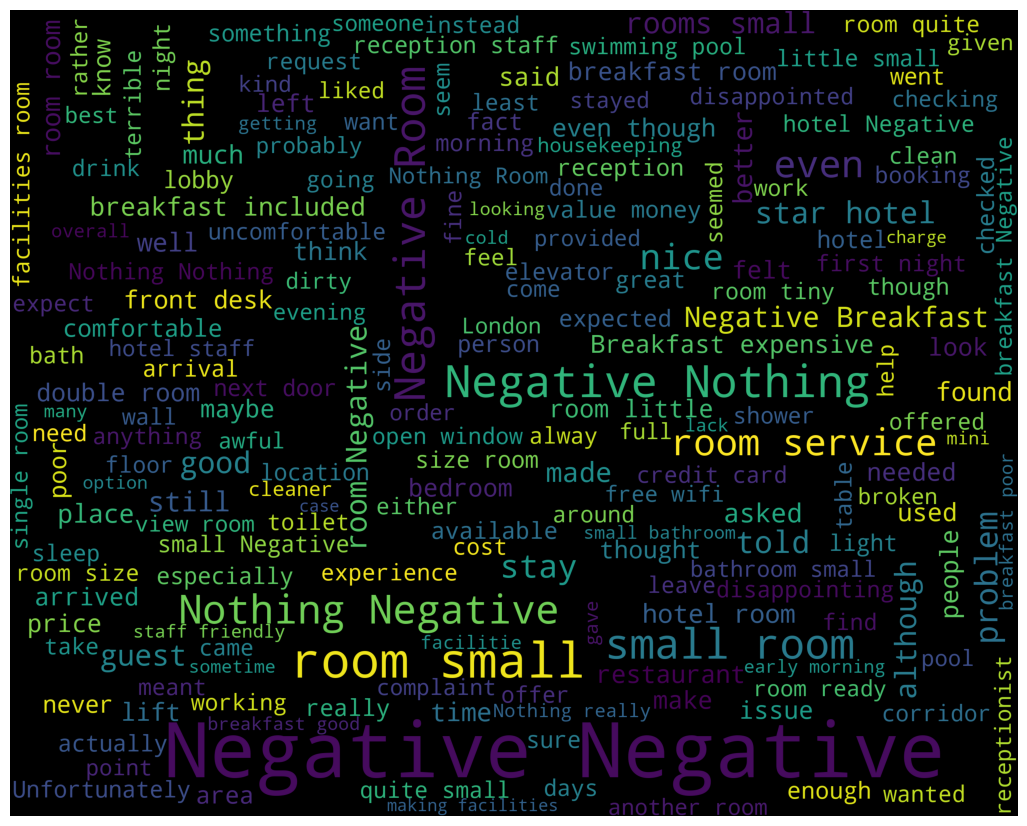

In [24]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive reviews")
wordcloud_draw(reviews_1,'white')
print("Negative reviews")
wordcloud_draw(reviews_2)


In [ ]:
import pandas as pd

df = pd.read_csv("Hotel_Reviews.csv")

def hotels_country(country_name):
  """This function takes a country name as input and returns the top 10 different hotels in that country based on average score."""

  # Import the data
  df = pd.read_csv("Hotel_Reviews.csv")

  # Get the hotels in the specified country.
  filter_countryname = df[df.Hotel_Address.str.contains(country_name)]
  
  # Remove duplicates
  remove_duplicate = filter_countryname.drop_duplicates(subset='Hotel_Address')
  # Sort the hotels by average score.
  final_list_based_on_score = remove_duplicate[['Hotel_Address', 'Average_Score']].sort_values(by='Average_Score', ascending=False)
  print(final_list_based_on_score)

  return final_list_based_on_score


if __name__ == "__main__":
  country_name = input("Enter a country name: ")
  top_hotels = hotels_country(country_name)


In [ ]:
def hotels_country(country_name):
  """This function takes a country name as input and returns the top 10 different hotels in that country based on average score."""

  # Import the data
  df = pd.read_csv("Hotel_Reviews.csv")

  # Get the hotels in the specified country.
  filter_countryname = df[df.Hotel_Address.str.contains(country_name)]
  
  # Remove duplicates
  remove_duplicate = filter_countryname.drop_duplicates(subset='Hotel_Address')
  # Sort the hotels by average score.
  final_list_based_on_score = remove_duplicate[['Hotel_Address', 'Average_Score']].sort_values(by='Average_Score', ascending=False)

  def print_with_scroll(df):
    max_rows = 10
    i = 0
    print(final_list_based_on_score)
    for row in df.iterrows():
      if i == max_rows:
        print("Press enter to scroll down")
        input()
        i = 0
      print(row[1][0]," | ", row[1][1])
      i = i + 1

  print_with_scroll(final_list_based_on_score)

  return final_list_based_on_score

if __name__ == "__main__":
  country_name = input("Enter a country name: ")
  top_hotels = hotels_country(country_name)


In [ ]:
def hotels_country(country_name):
  """This function takes a country name as input and returns the top 10 different hotels in that country based on average score."""

  # Import the data
  df = pd.read_csv("Hotel_Reviews.csv")

  # Get the hotels in the specified country.
  filter_countryname = df[df.Hotel_Address.str.contains(country_name)]
  
  # Remove duplicates
  remove_duplicate = filter_countryname.drop_duplicates(subset='Hotel_Address')
  # Sort the hotels by average score.
  final_list_based_on_score = remove_duplicate[['Hotel_Address', 'Average_Score']].sort_values(by='Average_Score', ascending=False)

  def print_with_scroll(df):
    max_rows = 10
    i = 0
    print("The top 10 hotels in {} with the highest average score are:".format(country_name))
    print("Hotel Address                        | Average Score")
    for row in df.iterrows():
      if i == max_rows:
        print("Press enter to scroll down")
        input()
        i = 0
      print(row[1][0]," | ", row[1][1])
      i = i + 1

  print_with_scroll(final_list_based_on_score)

  return final_list_based_on_score


if __name__ == "__main__":
  country_name = input("Enter a country name: ")
  top_hotels = hotels_country(country_name)


In [16]:
#Loading the unique Hotel's information to plot them on the map
temp_df = df.drop_duplicates(['Hotel_Name'])
len(temp_df)

1492

In [13]:
import numpy as np
import pandas as pd

def check_nan_values(df):
  """This function checks the DataFrame for NaN values."""

  for column in df.columns:
    if pd.isnull(df[column].iloc[0]):
      print("The column {} contains NaN values.".format(column))

if __name__ == "__main__":
  temp_df = pd.read_csv("Hotel_Reviews.csv")
  check_nan_values(temp_df)


In [14]:
import numpy as np
import pandas as pd

def remove_nan_rows(df):
  """This function removes rows that contain NaN values."""

  df.dropna(inplace=True)

if __name__ == "__main__":
  temp_df = pd.read_csv("Hotel_Reviews.csv")
  remove_nan_rows(temp_df)
  check_nan_values(temp_df)


In [ ]:
import folium
map_osm = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )

temp_df.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]]).add_to(map_osm), axis=1)

map_osm

In [15]:
import folium

# Import the hotel reviews dataset
hotel_reviews = pd.read_csv("hotel_reviews.csv")

# Get the latitude and longitude of each hotel
hotel_lat = hotel_reviews["lat"]
hotel_lng = hotel_reviews["lng"]

# Create a map of Europe
m = folium.Map(location=[47.397, 19.040])

# Add markers to the map for each hotel
for lat, lng in zip(hotel_lat, hotel_lng):
    folium.Marker([lat, lng]).add_to(m)

# Display the map
m


ValueError: Location values cannot contain NaNs.